In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pylab
import geopandas
sns.set()

In [2]:
import chart_studio
chart_studio.tools.set_credentials_file(username='koshh', api_key='••••••••••')
import plotly

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
plotly.offline.init_notebook_mode()

In [3]:
# Load dataset
df = pd.read_csv('df.csv').drop(['Unnamed: 0'],axis=1)
df.head()

InvoiceNo StockCode  Quantity       InvoiceDate  UnitPrice CustomerID  \
0    536365    85123A         6  01-12-2010 08:26       2.55     C17850   
1    536365     71053         6  01-12-2010 08:26       3.39     C17850   
2    536365    84406B         8  01-12-2010 08:26       2.75     C17850   
3    536365    84029G         6  01-12-2010 08:26       3.39     C17850   
4    536365    84029E         6  01-12-2010 08:26       3.39     C17850   

          Country                          Description  CancelledOrder  \
0  United Kingdom   CREAM HANGING HEART T-LIGHT HOLDER               0   
1  United Kingdom                  WHITE METAL LANTERN               0   
2  United Kingdom       CREAM CUPID HEARTS COAT HANGER               0   
3  United Kingdom  KNITTED UNION FLAG HOT WATER BOTTLE               0   
4  United Kingdom       RED WOOLLY HOTTIE WHITE HEART.               0   

   InternationalOrders  TotalPrice  
0                    0       15.30  
1                    0       20.34  
2                    0       22.00  
3                    0       20.34  
4                    0       20.34

## Exploratory Data Analysis

In [4]:
import geopandas as gpd

# Replace with the actual path to your extracted .shp file
shapefile_path = r"C:\Users\sairi\Downloads\110m_cultural"

# Load the shapefile into GeoPandas
world = gpd.read_file(shapefile_path)
print(world.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SCALERANK   331 non-null    int64   
 1   FEATURECLA  331 non-null    object  
 2   NAME        0 non-null      object  
 3   NAME_ALT    0 non-null      object  
 4   MIN_ZOOM    331 non-null    float64 
 5   FCLASS_ISO  9 non-null      object  
 6   FCLASS_US   5 non-null      object  
 7   FCLASS_FR   5 non-null      object  
 8   FCLASS_RU   19 non-null     object  
 9   FCLASS_ES   6 non-null      object  
 10  FCLASS_CN   18 non-null     object  
 11  FCLASS_TW   8 non-null      object  
 12  FCLASS_IN   15 non-null     object  
 13  FCLASS_NP   9 non-null      object  
 14  FCLASS_PK   13 non-null     object  
 15  FCLASS_DE   5 non-null      object  
 16  FCLASS_GB   5 non-null      object  
 17  FCLASS_BR   7 non-null      object  
 18  FCLASS_IL   7 non-null      object  
 19  

C:\Users\sairi\AppData\Local\Programs\Python\Python310\lib\site-packages\pyogrio\geopandas.py:265: UserWarning:

More than one layer found in '110m_cultural': 'ne_110m_admin_0_boundary_lines_land' (default), 'ne_110m_admin_0_countries', 'ne_110m_admin_0_countries_lakes', 'ne_110m_admin_0_map_units', 'ne_110m_admin_0_pacific_groupings', 'ne_110m_admin_0_scale_rank', 'ne_110m_admin_0_sovereignty', 'ne_110m_admin_0_tiny_countries', 'ne_110m_admin_1_states_provinces', 'ne_110m_admin_1_states_provinces_lakes', 'ne_110m_admin_1_states_provinces_lines', 'ne_110m_admin_1_states_provinces_scale_rank', 'ne_110m_populated_places', 'ne_110m_populated_places_simple'. Specify layer parameter to avoid this warning.



In [5]:
# Match country names in df dataset and world dataframe

Countries = pd.DataFrame(df.Country.unique(),columns=['Country'])
Countries[~Countries.Country.isin(list(world.NAME))]

Country
0         United Kingdom
1                 France
2              Australia
3            Netherlands
4                Germany
5                 Norway
6                   EIRE
7            Switzerland
8                  Spain
9                 Poland
10              Portugal
11                 Italy
12               Belgium
13             Lithuania
14                 Japan
15               Iceland
16       Channel Islands
17               Denmark
18                Cyprus
19                Sweden
20               Austria
21                Israel
22               Finland
23                Greece
24             Singapore
25               Lebanon
26  United Arab Emirates
27          Saudi Arabia
28        Czech Republic
29                Canada
30                Brazil
31                   USA
32               Bahrain
33                 Malta
34                   RSA

In [6]:
# Sync country names in df and world datasets
df.Country.replace(to_replace={'EIRE':'Ireland','Channel Islands':'United Kingdom','Czech Republic':'Czech Rep.',
                       'RSA':'South Africa','Bahrain':'Saudi Arabia','Malta':'Italy'},inplace=True)
world.NAME.replace(to_replace={'Malaysia':'Singapore','United States':'USA'},inplace=True)
                       

In [7]:
def plotOnMap(world,colname,title):
    
    colormap = 'magma_r'
    ax = world.plot(column=colname, cmap=colormap, figsize=[18,12], edgecolor='gray', 
                    vmin=min(world[colname]),vmax=max(world[colname]))

    # map marginal/face deco
    ax.set_title('Distribution of International '+title+' (outside UK)',fontsize=17)
    ax.grid() 

    # colorbar will be created by ...
    fig = ax.get_figure()
    # add colorbar axes to the figure
    # here, need trial-and-error to get [l,b,w,h] right
    # l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
    cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])   
    cbax.set_title('Number of '+title)

    sm = plt.cm.ScalarMappable(cmap=colormap, \
                    norm=plt.Normalize(vmin=min(world[colname]), vmax=max(world[colname])))
    # at this stage, 
    # 'cbax' is just a blank axes, with un needed labels on x and y axes

    # blank-out the array of the scalar mappable 'sm'
    sm._A = []
    # draw colorbar into 'cbax'
    fig.colorbar(sm, cax=cbax, format="%d")

    # dont use: plt.tight_layout()
    plt.show()
    


In [8]:
def plotPie(pie_df,colname,title):
    fig = plt.figure(figsize=(5,5))

    colors = ['navajowhite', 'sandybrown']
    plt.pie(pie_df[colname],labels=pie_df.location,autopct='%1.1f%%',colors=colors)
    plt.title(title.title()+' Percentage in UK and outside UK')
    
    plt.tight_layout()
    plt.show()

In [15]:
def addToWorld(world, col, colname, title):
    if 'CancelledOrder' in df.columns:
        temp_df = df[df['CancelledOrder'] == 1]['Country'].value_counts().to_frame(colname).reset_index()
    else:
        temp_df = df.groupby(['Country', col], as_index=False).count()['Country'].value_counts().to_frame(colname).reset_index()

    # Ensure the column to merge on exists
    if 'index' in temp_df.columns:
        merge_on = 'index'
    else:
        merge_on = 'Country'  # Or any other appropriate column

    # Merge and handle missing values
    world = pd.merge(world, temp_df, left_on='NAME', right_on=merge_on, how='left')
    world[colname] = world[colname].fillna(0)
    
    # Drop unnecessary columns if any
    if 'index' in world.columns:
        world.drop('index', axis=1, inplace=True)

    return world

In [16]:
addToWorld(world,'InvoiceNo','TotalOrders','orders')

SCALERANK                       FEATURECLA  NAME NAME_ALT  MIN_ZOOM  \
0            1  International boundary (verify)  None     None       0.0   
1            1  International boundary (verify)  None     None       0.0   
2            1  International boundary (verify)  None     None       0.0   
3            1  International boundary (verify)  None     None       0.0   
4            1  International boundary (verify)  None     None       0.0   
..         ...                              ...   ...      ...       ...   
326          1  International boundary (verify)  None     None       0.0   
327          1  International boundary (verify)  None     None       0.0   
328          1       Indefinite (please verify)  None     None       0.0   
329          1  Line of control (please verify)  None     None       0.0   
330          1  Line of control (please verify)  None     None       0.0   

                          FCLASS_ISO FCLASS_US FCLASS_FR     FCLASS_RU  \
0                               None      None      None          None   
1                               None      None      None          None   
2                               None      None      None          None   
3                               None      None      None          None   
4                               None      None      None          None   
..                               ...       ...       ...           ...   
326                             None      None      None          None   
327                             None      None      None          None   
328                             None      None      None          None   
329                             None      None      None  Unrecognized   
330  International boundary (verify)      None      None  Unrecognized   

    FCLASS_ES  ... FCLASS_NL FCLASS_SE FCLASS_BD FCLASS_UA       NE_ID BRK_A3  \
0        None  ...      None      None      None      None  1746708375   None   
1        None  ...      None      None      None      None  1746707693   None   
2        None  ...      None      None      None      None  1746706445   None   
3        None  ...      None      None      None      None  1746707717   None   
4        None  ...      None      None      None      None  1746707701   None   
..        ...  ...       ...       ...       ...       ...         ...    ...   
326      None  ...      None      None      None      None  1746705433   None   
327      None  ...      None      None      None      None  1746707251   None   
328      None  ...      None      None      None      None  1746705327   None   
329      None  ...      None      None      None      None  1746709133    B05   
330      None  ...      None      None      None      None  1746709141    B05   

                          FCLASS_TLC  \
0                               None   
1                               None   
2                               None   
3                               None   
4                               None   
..                               ...   
326                             None   
327                             None   
328                             None   
329                             None   
330  Line of control (please verify)   

                                              geometry Country TotalOrders  
0    LINESTRING (-130.53611 54.80278, -129.98 55.28...     NaN         0.0  
1    LINESTRING (-117.12776 32.53534, -115.99135 32...     NaN         0.0  
2    LINESTRING (-90.09555 13.73534, -90.06467 13.8...     NaN         0.0  
3    LINESTRING (-92.22776 14.53883, -92.20323 14.8...     NaN         0.0  
4    LINESTRING (-88.93062 15.88728, -89.22913 15.8...     NaN         0.0  
..                                                 ...     ...         ...  
326  LINESTRING (87.36 49.215, 87.75129 49.2972, 88...     NaN         0.0  
327  LINESTRING (116.67878 49.88856, 116.67878 49.8...     NaN         0.0  
328  LINESTRING (35.55278 33.26427, 35.46069 33.089...  

In [17]:
addToWorld(world,'CustomerID','TotalCust','customers')

SCALERANK                       FEATURECLA  NAME NAME_ALT  MIN_ZOOM  \
0            1  International boundary (verify)  None     None       0.0   
1            1  International boundary (verify)  None     None       0.0   
2            1  International boundary (verify)  None     None       0.0   
3            1  International boundary (verify)  None     None       0.0   
4            1  International boundary (verify)  None     None       0.0   
..         ...                              ...   ...      ...       ...   
326          1  International boundary (verify)  None     None       0.0   
327          1  International boundary (verify)  None     None       0.0   
328          1       Indefinite (please verify)  None     None       0.0   
329          1  Line of control (please verify)  None     None       0.0   
330          1  Line of control (please verify)  None     None       0.0   

                          FCLASS_ISO FCLASS_US FCLASS_FR     FCLASS_RU  \
0                               None      None      None          None   
1                               None      None      None          None   
2                               None      None      None          None   
3                               None      None      None          None   
4                               None      None      None          None   
..                               ...       ...       ...           ...   
326                             None      None      None          None   
327                             None      None      None          None   
328                             None      None      None          None   
329                             None      None      None  Unrecognized   
330  International boundary (verify)      None      None  Unrecognized   

    FCLASS_ES  ... FCLASS_NL FCLASS_SE FCLASS_BD FCLASS_UA       NE_ID BRK_A3  \
0        None  ...      None      None      None      None  1746708375   None   
1        None  ...      None      None      None      None  1746707693   None   
2        None  ...      None      None      None      None  1746706445   None   
3        None  ...      None      None      None      None  1746707717   None   
4        None  ...      None      None      None      None  1746707701   None   
..        ...  ...       ...       ...       ...       ...         ...    ...   
326      None  ...      None      None      None      None  1746705433   None   
327      None  ...      None      None      None      None  1746707251   None   
328      None  ...      None      None      None      None  1746705327   None   
329      None  ...      None      None      None      None  1746709133    B05   
330      None  ...      None      None      None      None  1746709141    B05   

                          FCLASS_TLC  \
0                               None   
1                               None   
2                               None   
3                               None   
4                               None   
..                               ...   
326                             None   
327                             None   
328                             None   
329                             None   
330  Line of control (please verify)   

                                              geometry Country TotalCust  
0    LINESTRING (-130.53611 54.80278, -129.98 55.28...     NaN       0.0  
1    LINESTRING (-117.12776 32.53534, -115.99135 32...     NaN       0.0  
2    LINESTRING (-90.09555 13.73534, -90.06467 13.8...     NaN       0.0  
3    LINESTRING (-92.22776 14.53883, -92.20323 14.8...     NaN       0.0  
4    LINESTRING (-88.93062 15.88728, -89.22913 15.8...     NaN       0.0  
..                                                 ...     ...       ...  
326  LINESTRING (87.36 49.215, 87.75129 49.2972, 88...     NaN       0.0  
327  LINESTRING (116.67878 49.88856, 116.67878 49.8...     NaN       0.0  
328  LINESTRING (35.55278 33.26427, 35.46069 33.089...     NaN       0.0  

In [18]:
addToWorld(world,None,'Cancelled','cancelled orders')

SCALERANK                       FEATURECLA  NAME NAME_ALT  MIN_ZOOM  \
0            1  International boundary (verify)  None     None       0.0   
1            1  International boundary (verify)  None     None       0.0   
2            1  International boundary (verify)  None     None       0.0   
3            1  International boundary (verify)  None     None       0.0   
4            1  International boundary (verify)  None     None       0.0   
..         ...                              ...   ...      ...       ...   
326          1  International boundary (verify)  None     None       0.0   
327          1  International boundary (verify)  None     None       0.0   
328          1       Indefinite (please verify)  None     None       0.0   
329          1  Line of control (please verify)  None     None       0.0   
330          1  Line of control (please verify)  None     None       0.0   

                          FCLASS_ISO FCLASS_US FCLASS_FR     FCLASS_RU  \
0                               None      None      None          None   
1                               None      None      None          None   
2                               None      None      None          None   
3                               None      None      None          None   
4                               None      None      None          None   
..                               ...       ...       ...           ...   
326                             None      None      None          None   
327                             None      None      None          None   
328                             None      None      None          None   
329                             None      None      None  Unrecognized   
330  International boundary (verify)      None      None  Unrecognized   

    FCLASS_ES  ... FCLASS_NL FCLASS_SE FCLASS_BD FCLASS_UA       NE_ID BRK_A3  \
0        None  ...      None      None      None      None  1746708375   None   
1        None  ...      None      None      None      None  1746707693   None   
2        None  ...      None      None      None      None  1746706445   None   
3        None  ...      None      None      None      None  1746707717   None   
4        None  ...      None      None      None      None  1746707701   None   
..        ...  ...       ...       ...       ...       ...         ...    ...   
326      None  ...      None      None      None      None  1746705433   None   
327      None  ...      None      None      None      None  1746707251   None   
328      None  ...      None      None      None      None  1746705327   None   
329      None  ...      None      None      None      None  1746709133    B05   
330      None  ...      None      None      None      None  1746709141    B05   

                          FCLASS_TLC  \
0                               None   
1                               None   
2                               None   
3                               None   
4                               None   
..                               ...   
326                             None   
327                             None   
328                             None   
329                             None   
330  Line of control (please verify)   

                                              geometry Country Cancelled  
0    LINESTRING (-130.53611 54.80278, -129.98 55.28...     NaN       0.0  
1    LINESTRING (-117.12776 32.53534, -115.99135 32...     NaN       0.0  
2    LINESTRING (-90.09555 13.73534, -90.06467 13.8...     NaN       0.0  
3    LINESTRING (-92.22776 14.53883, -92.20323 14.8...     NaN       0.0  
4    LINESTRING (-88.93062 15.88728, -89.22913 15.8...     NaN       0.0  
..                                                 ...     ...       ...  
326  LINESTRING (87.36 49.215, 87.75129 49.2972, 88...     NaN       0.0  
327  LINESTRING (116.67878 49.88856, 116.67878 49.8...     NaN       0.0  
328  LINESTRING (35.55278 33.26427, 35.46069 33.089...     NaN       0.0  

                             Description  Quantity  TotalPrice  AvgUnitPrice
3573   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215    13332.33      0.250537
2468                      POPCORN HOLDER     48712    36859.88      0.756690
1680             JUMBO BAG RED RETROSPOT     45066    83236.76      1.846997
201        ASSORTED COLOUR BIRD ORNAMENT     35292    56462.04      1.599854
828   CREAM HANGING HEART T-LIGHT HOLDER     34204    93979.20      2.747608
2156     PACK OF 72 RETROSPOT CAKE CASES     33385    16234.75      0.486289
2524                  RABBIT NIGHT LIGHT     27094    51137.80      1.887422
1945              MINI PAINT SET VINTAGE     25880    15911.84      0.614832
2124           PACK OF 12 LONDON TISSUES     25321     7258.55      0.286661
2154  PACK OF 60 PINK PAISLEY CAKE CASES     24139    11560.95      0.478932


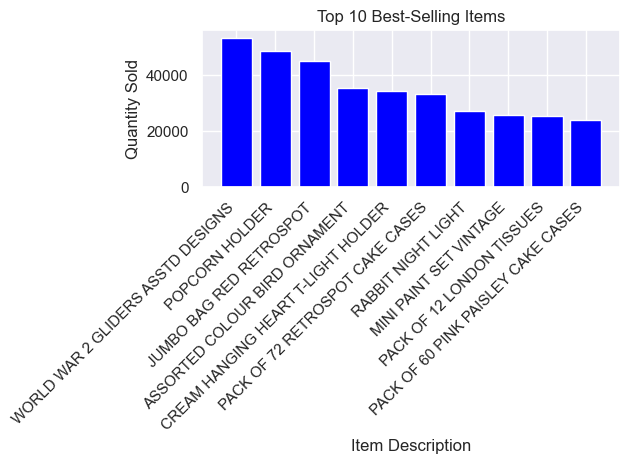

In [20]:
# Find the 10 best-selling items
Top10Qty = (
    df.groupby('Description', as_index=False)[['Quantity', 'TotalPrice']]
    .sum()
    .sort_values(by='Quantity', ascending=False)
    .head(10)
)

# Calculate average unit price
Top10Qty['AvgUnitPrice'] = Top10Qty['TotalPrice'] / Top10Qty['Quantity']

# Inspect the result
print(Top10Qty)

# Plot top 10 most popular items (example with matplotlib)
import matplotlib.pyplot as plt

plt.bar(Top10Qty['Description'], Top10Qty['Quantity'], color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Best-Selling Items')
plt.xlabel('Item Description')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()


                             Description  TotalPrice  Quantity  AvgUnitPrice
2634            REGENCY CAKESTAND 3 TIER   132844.90     11553     11.498736
828   CREAM HANGING HEART T-LIGHT HOLDER    93979.20     34204      2.747608
1680             JUMBO BAG RED RETROSPOT    83236.76     45066      1.846997
2222                       PARTY BUNTING    67687.53     15027      4.504394
201        ASSORTED COLOUR BIRD ORNAMENT    56462.04     35292      1.599854
2524                  RABBIT NIGHT LIGHT    51137.80     27094      1.887422
2270      PICNIC BASKET WICKER 60 PIECES    46980.95      1413     33.249080
696                        CHILLI LIGHTS    45936.81      9570      4.800085
2196      PAPER CHAIN KIT 50'S CHRISTMAS    41500.48     15164      2.736777
354             BLACK RECORD COVER FRAME    39009.38     11391      3.424579


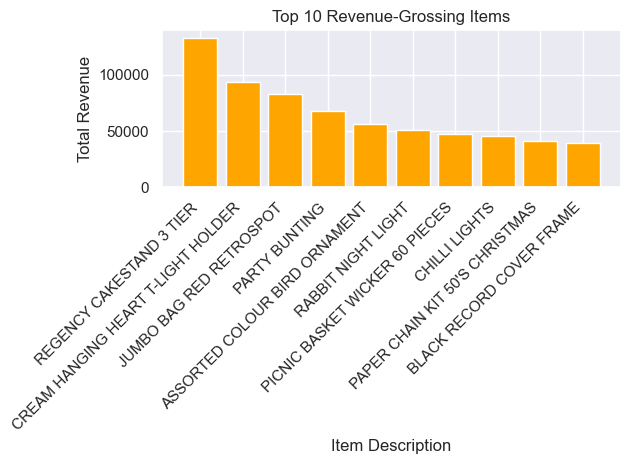

In [22]:
# Top 10 revenue-grossing items
Top10Rev = (
    df.groupby('Description', as_index=False)[['TotalPrice', 'Quantity']]
    .sum()
    .sort_values(by='TotalPrice', ascending=False)
    .head(10)
)

# Calculate average unit price
Top10Rev['AvgUnitPrice'] = Top10Rev['TotalPrice'] / Top10Rev['Quantity']

# Inspect the result
print(Top10Rev)

# Plot top 10 revenue-grossing items
import matplotlib.pyplot as plt

plt.bar(Top10Rev['Description'], Top10Rev['TotalPrice'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Revenue-Grossing Items')
plt.xlabel('Item Description')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


In [23]:
# Number of unique items and customers

print(len(df.Description.unique()))
print(len(df.CustomerID.unique()))

3652
4357


### Pareto Principle

The Pareto principle (also known as the 80/20 rule) states that, for many events, roughly 80% of the effects come from 20% of the causes.(Source: wikipedia)

For a sales entity, Pareto pinciple could suggest that 80% sales of a company comes from 20% of its products and/or 80% of its sales comes from 20% of its customers.

Our online retail store has 3652 unique items for sale, and 4357 unique customers for the period from Dec 1 2010 to Dec 9 2011. Here, Pareto principle is of value because instead of focussing on such a huge number of items and customers, the company needs to just focus on 20% of these in order to effect 80% of its sales.

Let us check the applicability of Pareto principle for our dataset.

In [ ]:
# # Pareto principle

# pareto_df = df.groupby('Description',as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)
# pareto_df['cumulative_sum'] = pareto_df.TotalPrice.cumsum()
# pareto_df['cumulative_perc'] = 100*pareto_df.cumulative_sum/pareto_df.TotalPrice.sum()
# pareto_df.head()

In [ ]:
# pareto_threshold = int(len(pareto_df)*.20)
# pareto_df.head(pareto_threshold).tail(1)

In [ ]:
# # Graphical representation of Pareto Principle
# pareto_df['demarcation'] = 80

# trace1 = Bar(x=pareto_df.Description,y=pareto_df.TotalPrice, name='Sales Revenue', marker=dict(color='rgb(34,163,192)'))
# trace2 = Scatter(
#     x=pareto_df.Description,
#     y=pareto_df.cumulative_perc,
#     name='Cumulative Percentage',
#     yaxis='y2',
#     line=dict(
#         color='rgb(243,158,115)',
#         width=2.4
#        )
# )
# trace3 = Scatter(
#     x=pareto_df.Description,
#     y=pareto_df.demarcation,
#     name='80%',
#     yaxis='y2',
#     line=dict(
#         color='rgba(128,128,128,.45)',
#         dash = 'dash',
#         width=1.5
#        )
# )
# trace4 = Scatter(
#     x=[pareto_df.head(pareto_threshold).tail(1).Description],
#     y=[120000],
#     text=['20% of items'],
#     mode='text',
# )

# data = [trace1, trace2, trace3, trace4]

# layout = Layout(title='Itemwise sales revenue from 1-Dec-2010 to 9-Dec-2011', 
#                 titlefont=dict(color='black', family='Balto, sans-serif', size=12), 
#                 font=Font(color='rgb(128,128,128)', family='Balto, sans-serif', size=12), width=1500, height=623, 
#                 paper_bgcolor='rgb(240, 240, 240)', plot_bgcolor='rgb(240, 240, 240)', hovermode='closest', 
#                 margin=dict(b=250,l=60,r=60,t=65), showlegend=True, 
#                 legend=dict(x=.83, y=1.3, font=dict(family='Balto, sans-serif', size=12, color='rgba(128,128,128,.75)'),),
#                 annotations=[ dict(text="Cumulative Percentage", showarrow=False, xref="paper", yref="paper", textangle=90, 
#                                    x=1.029, y=.75, font=dict(family='Balto, sans-serif', size=14, color='rgba(243,158,115,.9)'),
#                                   )], 
#                 shapes=[{'type':'line', 'x0':pareto_threshold,'y0':0,'x1':pareto_threshold,'y1':120000,
#                          'line':{'color':'rgb(128,128,128,.45)','dash':'dot','width': 1.5}}],
#                 xaxis=dict(tickangle=-90), 
#                 yaxis=dict(title='Sales (in £)', range=[0,130500], 
#                                                       tickfont=dict(color='rgba(34,163,192,.75)'),
#                                                       tickvals = [0,26000,52000,77500,100000,120000], 
#                                                       titlefont=dict(family='Balto, sans-serif', size=14,
#                                                                      color='rgba(34,163,192,.75)')), 
#                 yaxis2=dict(range=[0,101], tickfont=dict(color='rgba(243,158,115,.9)'), tickvals = [0,20,40,60,80,100],
#                             overlaying='y', side='right'))

# fig = dict(data=data, layout=layout)
# iplot(fig)

In [24]:
def applyPareto(df,column_20, measure):
    '''
    Checks the contribution of 20% of a cause to 80% of sales revenue
     ----------------
    Input:
        df: dataset on which Pareto principle is to be checked
        column_20: column to be checked for 20% of its unique entries to affect 80% of sales
        measure: string - the measure that is conributing to 80%
    ----------------
    '''
    pareto_df = df.groupby(column_20,as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)
    pareto_df['cumulative_sum'] = pareto_df.TotalPrice.cumsum()
    pareto_df['cumulative_perc'] = 100*pareto_df.cumulative_sum/pareto_df.TotalPrice.sum()
    
    item_perc = round(len(pareto_df[(pareto_df.cumulative_perc)<80])/len(pareto_df)*100)

    print(item_perc,'% of',measure,'contribute to 80% of sales')
    print(item_perc,'% means',round(item_perc/100*len(pareto_df)),measure)
    
    plotPareto(pareto_df, column_20,measure)
    
def plotPareto(pareto_df,column_20,measure):
    '''
    Displays applicability of Pareto Principle on a dataset
    '''
    # Graphical representation of Pareto Principle
    pareto_df['demarcation'] = 80
    pareto_threshold = int(len(pareto_df)*.20)


    trace1 = Bar(x=pareto_df[column_20],y=pareto_df.TotalPrice, name='Sales Revenue', marker=dict(color='rgb(34,163,192)'))
    trace2 = Scatter(
        x=pareto_df[column_20],
        y=pareto_df.cumulative_perc,
        name='Cumulative Percentage',
        yaxis='y2',
        line=dict(
            color='rgb(243,158,115)',
            width=2.4
           )
    )
    trace3 = Scatter(
        x=pareto_df[column_20],
        y=pareto_df.demarcation,
        name='80%',
        yaxis='y2',
        line=dict(
            color='rgba(128,128,128,.45)',
            dash = 'dash',
            width=1.5
           )
    )
    trace4 = Scatter(
        x=[pareto_df.head(pareto_threshold).tail(1)[column_20]],
        y=[round(max(pareto_df.TotalPrice))*.90],
        text=['20% of items'],
        mode='text',
    )

    data = [trace1, trace2, trace3, trace4]
    
    layout = Layout(title=measure+'wise sales revenue from 1-Dec-2010 to 9-Dec-2011', 
                    titlefont=dict(color='black', family='Balto, sans-serif', size=12), 
                    font=Font(color='rgb(128,128,128)', family='Balto, sans-serif', size=12), width=1500, height=623, 
                    paper_bgcolor='rgb(240, 240, 240)', plot_bgcolor='rgb(240, 240, 240)', hovermode='closest', 
                    margin=dict(b=250,l=60,r=60,t=65), showlegend=True, 
                    legend=dict(x=.83, y=1.3, font=dict(family='Balto, sans-serif', size=12, color='rgba(128,128,128,.75)'),),
                    annotations=[ dict(text="Cumulative Percentage", showarrow=False, xref="paper", yref="paper", textangle=90, 
                                       x=1.029, y=.75, font=dict(family='Balto, sans-serif', size=14, color='rgba(243,158,115,.9)'),
                                      )], 
                    shapes=[{'type':'line', 'x0':pareto_threshold,'y0':0,'x1':pareto_threshold,'y1':round(max(pareto_df.TotalPrice)),
                             'line':{'color':'rgb(128,128,128,.45)','dash':'dot','width': 1.5}}],
                    xaxis=dict(tickangle=-90), 
                    yaxis=dict(title='Sales (in £)', range=[0,round(max(pareto_df.TotalPrice))], dtick=1,
                                                          tickfont=dict(color='rgba(34,163,192,.75)'),
                                                          tickvals = np.linspace(0,max(round(pareto_df.TotalPrice)),6), 
                                                          titlefont=dict(family='Balto, sans-serif', size=14,
                                                                         color='rgba(34,163,192,.75)'),tickformat='.0f'), 
                    yaxis2=dict(range=[0,101], tickfont=dict(color='rgba(243,158,115,.9)'), tickvals = [0,20,40,60,80,100],
                                overlaying='y', side='right'))

    fig = dict(data=data, layout=layout)
    iplot(fig)

In [25]:
applyPareto(df,'Description','items')


22 % of items contribute to 80% of sales
22 % means 803 items


C:\Users\sairi\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\graph_objs\_deprecations.py:322: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.




Pareto principle holds true for items in our dataset, as 22% of all the items are contributing to 80% of the sales revenue. 22% of all items means 803 items.

In [26]:
applyPareto(df,'CustomerID','customers')

27 % of customers contribute to 80% of sales
27 % means 1176 customers


C:\Users\sairi\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\graph_objs\_deprecations.py:322: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.




27% of all the customers are contributing to 80% of the sales revenue. 27% of all items means 1176 items.

### Time Series plots

0    01-12-2010 08:26
1    01-12-2010 08:26
2    01-12-2010 08:26
3    01-12-2010 08:26
4    01-12-2010 08:26
Name: InvoiceDate, dtype: object


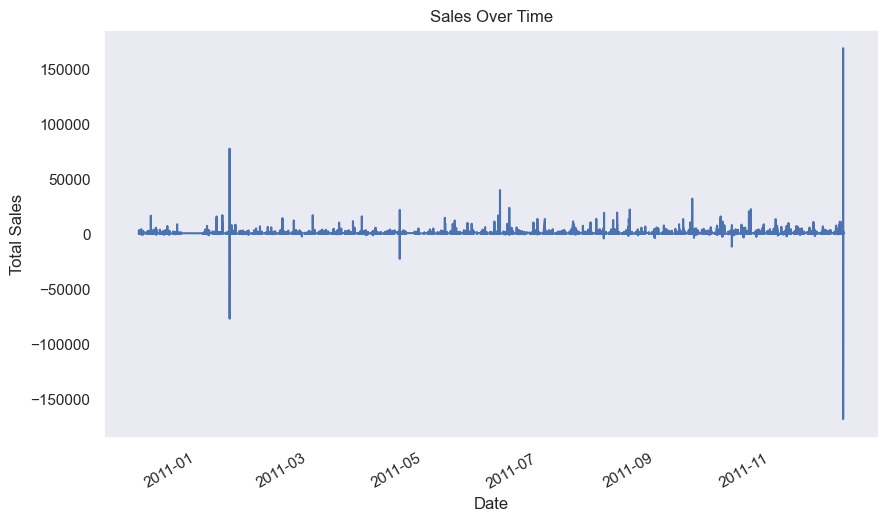

In [28]:
# Inspect unique date formats (optional)
print(df['InvoiceDate'].head())

# Convert the InvoiceDate to datetime with dayfirst=True
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', dayfirst=True)

# Drop or handle rows with invalid dates
if df['InvoiceDate'].isnull().any():
    print("Invalid dates detected. Handling them...")
    df = df.dropna(subset=['InvoiceDate'])  # Drop rows with invalid dates

# Aggregate sales data
sales = df.groupby('InvoiceDate')['TotalPrice'].sum()

# Ensure sales index is in datetime format
sales.index = pd.to_datetime(sales.index)

# Plot sales over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sales.plot()
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()



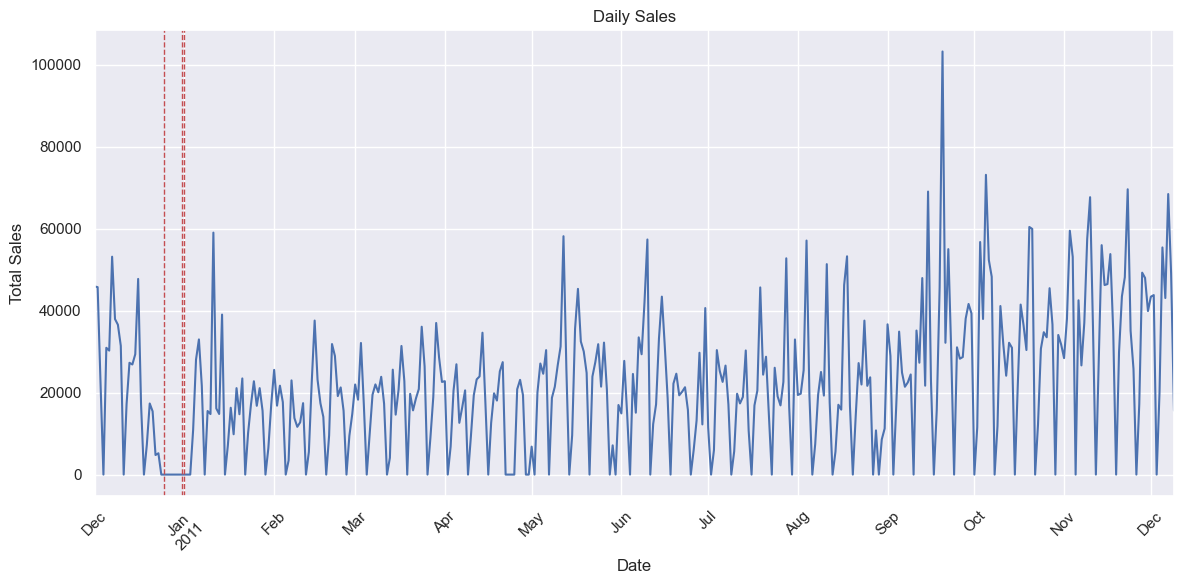

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab

def plotSales(sales, time_freq, xtick, freq, holidays=None):
    sales_resampled = sales.resample(time_freq).sum()

    plt.figure(figsize=(12, 6))
    sales_resampled.plot()
    plt.title(f"{freq} Sales")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    
    # Convert holidays to datetime if not already
    if holidays is not None:
        holidays = pd.to_datetime(holidays, errors='coerce')
        holidays = holidays.dropna()  # Remove any invalid dates
    
    # Add vertical lines for holidays
    if holidays is not None:
        for holiday in holidays:
            plt.axvline(holiday, linewidth=1, color='r', linestyle='--')
    
    # Add labels
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example: Fix holidays and plot
holidays = ['2010-12-25', '2010-12-31', '2011-01-01']  # Replace with your holiday dates
plotSales(sales, time_freq='D', xtick=4, freq='Daily', holidays=holidays)


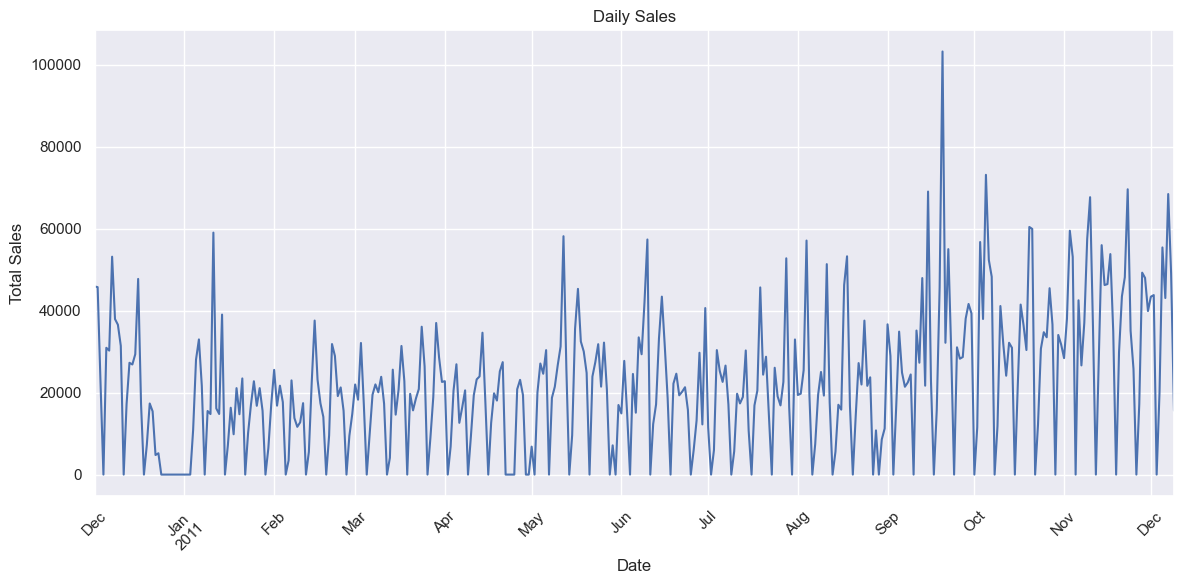

In [32]:
plotSales(sales,'D',4,'Daily')

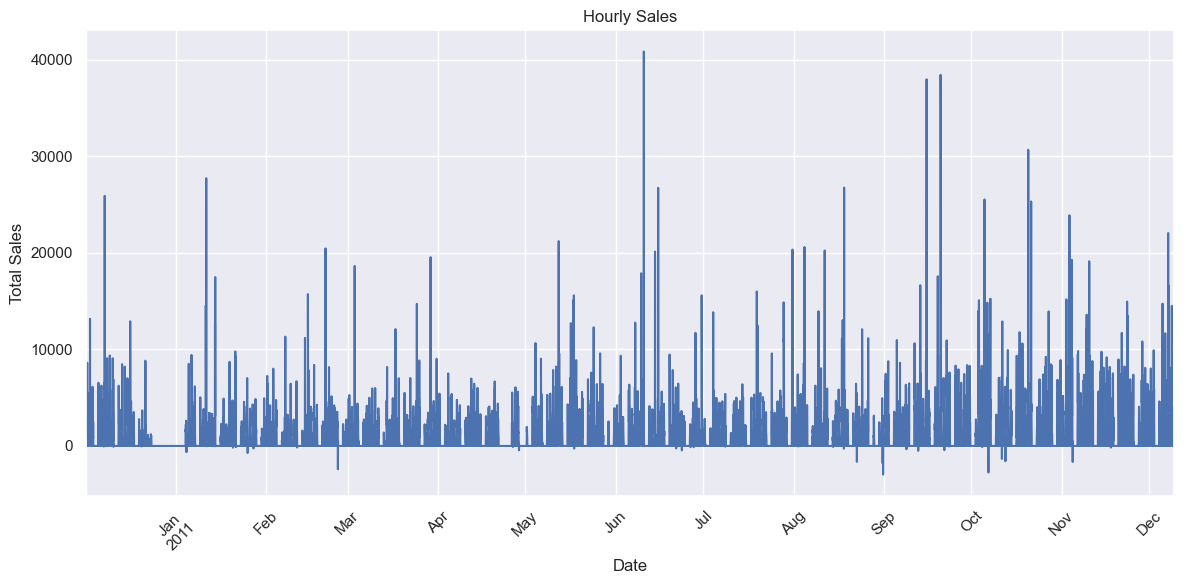

In [33]:
plotSales(sales,'H',200,'Hourly')

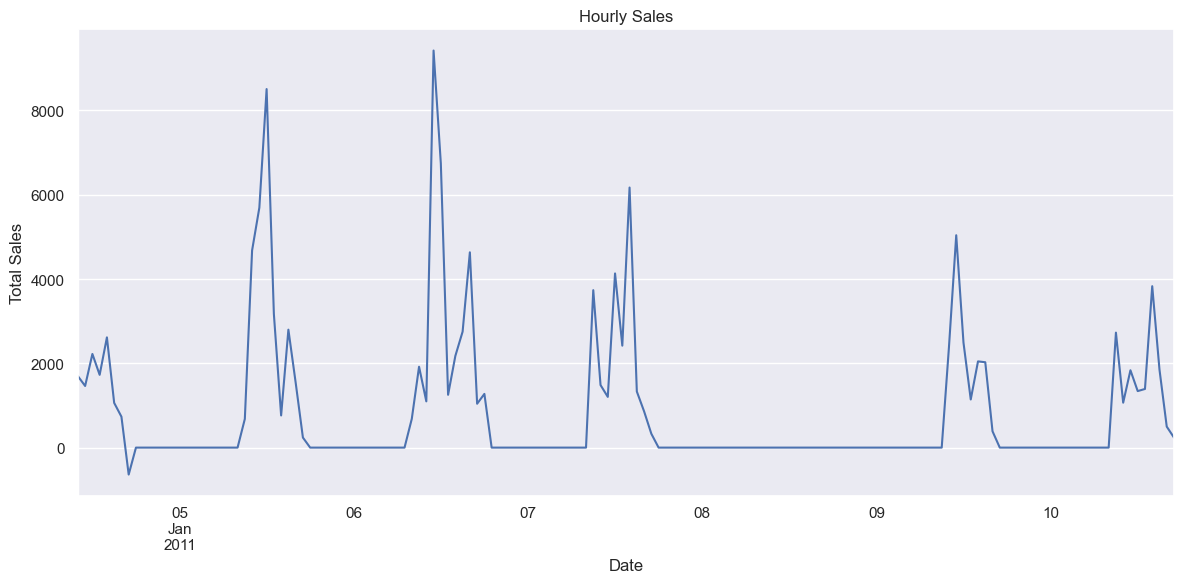

In [34]:
plotSales(sales['2011-01-01':'2011-01-10'],'H',4,'Hourly')

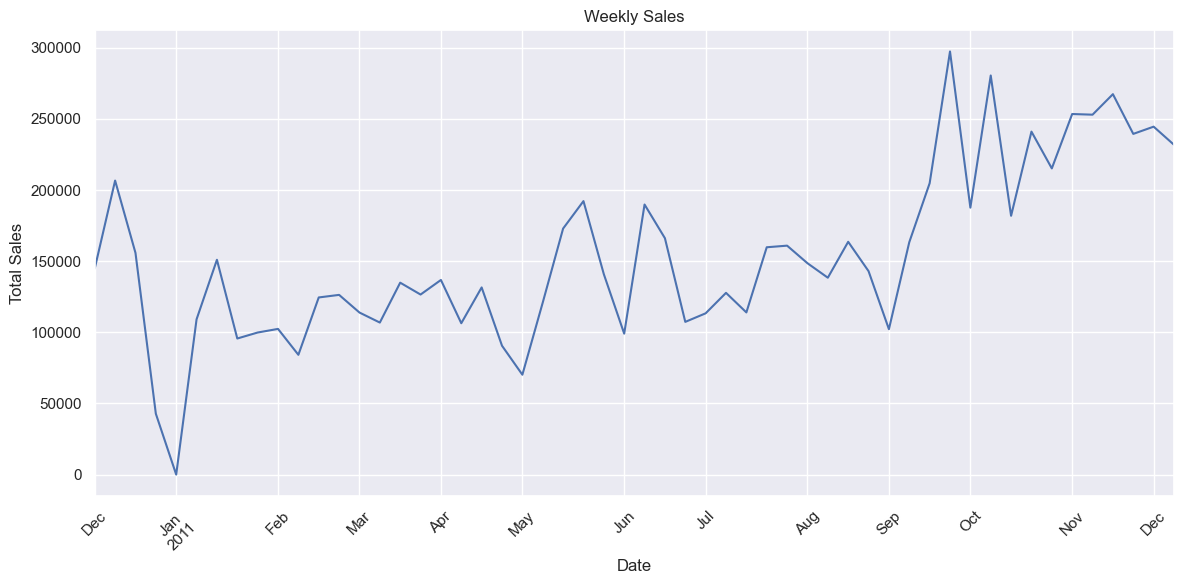

In [35]:
plotSales(sales,'W',1,'Weekly')

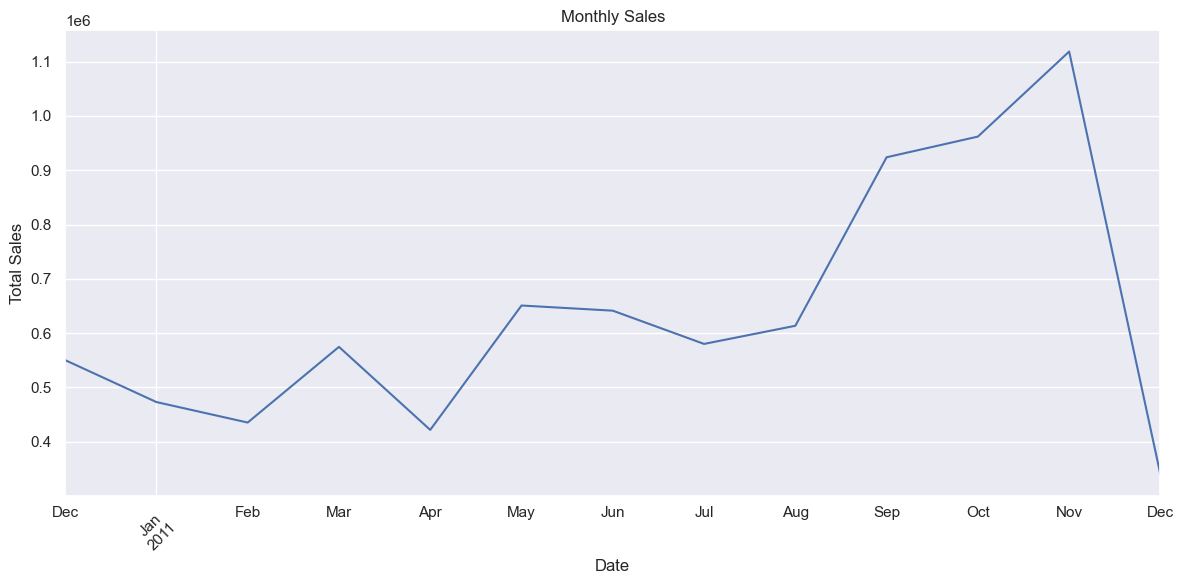

In [36]:
plotSales(sales,'M',1,'Monthly')

### Observations

1. There is no sales happening on Saturdays.
1. Sales falls down during the holidays
1. There is zero sales happening on Boxing day (Dec 26th) which probably means that the company does not offer any promotions during the holidays/special days.
1. Sales happens only during the working hours - between 8am and 6pm.
1. There is no particular trend seen in monthly and weekly sales. The overall sales has increased through the months.

In [37]:
df.to_csv('orders.csv')